## Linear Regression:

- Regression is a technique used to predict numerical values based on input features. It models the relationship between a dependent variable (what you want to predict) and independent variables (features).

- Type:
    
 (a) Simple Linear Regression: Predicting a continuous dependent variable using a single independent variable.
    
   Y = MX + C
   
 (b) Multiple Linear Regression: Predicting a dependent variable using multiple independent variables.
    
   Y = M1X1 + M2X2 + M3X3 + .............. + MnXn + C

X = Independent variable

Y = Dependent variable

M = Coefficient

C = Intercept

In [1]:
import pandas as pd

In [2]:
#for csv
df = pd.read_csv("data/Dhaka Rent.csv", sep=',')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


## EDA

In [3]:
df.shape # row, col

(60, 2)

In [4]:
#for xlsx
#df = pd.read_excel("Dhaka Rent 2.xlsx")
#df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [6]:
#missing checking
df.isnull().sum()

area    0
rent    0
dtype: int64

In [7]:
df['area'].head(5)

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [8]:
df[['rent']].head(5)

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


Text(0.5, 1.0, 'Dhaka Rent Analysis')

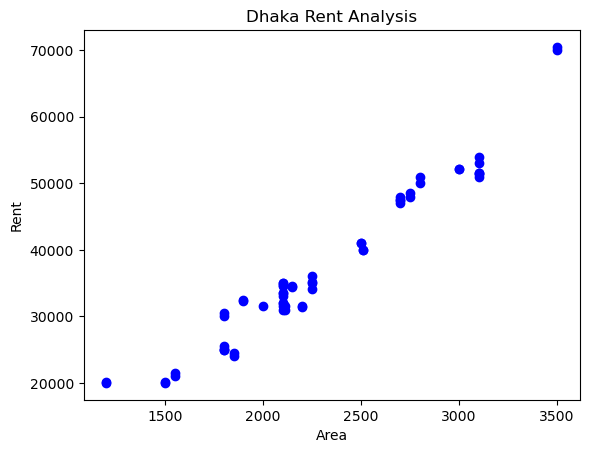

In [9]:
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

plt.scatter(df['area'], df['rent'], color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')

In [10]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [11]:
# x is the independent variable
# y is the depedent variable

x = df['area']
y = df['rent']

# Linear Reagression - Step 01

In [12]:
import numpy as np

In [13]:
mean_x = np.mean(x)
mean_y = np.mean(y)

print(f"mean_x={mean_x}")
print(f"mean_y={mean_y}")

mean_x=2289.0
mean_y=37269.166666666664


In [14]:
#calculate deviations

dev_x = x - mean_x
dev_y = y - mean_y

In [15]:
dev_x.head(5)

0   -289.0
1   -189.0
2    211.0
3    -39.0
4    711.0
Name: area, dtype: float64

In [16]:
dev_y.head(5)

0    -5769.166667
1    -2269.166667
2     3780.833333
3    -1169.166667
4    14830.833333
Name: rent, dtype: float64

1. Slope or coefficient, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

In [17]:
coefficient = np.sum(dev_x * dev_y) / np.sum(dev_x**2) 

print(f"coefficient = {coefficient}")

coefficient = 21.292661473611954


In [18]:
intercept = mean_y - (coefficient * mean_x)

print(f"intercept = {intercept}")

intercept = -11469.7354464311


In [19]:
pred_y = (coefficient * 2000) + intercept

In [20]:
print(f"pred_y = {pred_y}")

pred_y = 31115.58750079281


# Solution-02

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(df[['area']] , df[['rent']]) #training

LinearRegression()

In [24]:
reg.coef_

array([[21.29266147]])

In [25]:
reg.intercept_

array([-11469.73544643])

In [26]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [27]:
# Find the predicted rent for 2000 sft area using linear regression equation
# y = mx + c

m = reg.coef_
c = reg.intercept_

pred_y = m*2000 + c

print(f"pred_y = {pred_y}")

pred_y = [[31115.58750079]]


In [28]:
# Find the predicted rent for 2000 sft area using sklearn library

pred_y = reg.predict([[2000]])

print(f"pred_y = {pred_y}")

pred_y = [[31115.58750079]]


D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
# Predit rent for all area in the given dataset

df['predicted_rent'] = reg.predict(df[['area']])

In [30]:
df.head(5)

,area,rent,predicted_rent
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


### Finding Loss

residiuls = actual value - predicted value

In [31]:

df['residiuls'] = df['rent'] - df['predicted_rent']

In [32]:
df.head()

,area,rent,predicted_rent,residiuls
0,2000,31500,31115.587501,384.412499
1,2100,35000,33244.853648,1755.146352
2,2500,41050,41761.918238,-711.918238
3,2250,36100,36438.752869,-338.752869
4,3000,52100,52408.248974,-308.248974


### L1 Loss (Absolute Loss or Mean Absolute Error): MAE

- L1 loss is a type of loss function used to measure the difference between predicted values and actual observed values in regression problems.

- It calculates the absolute difference between the predicted value and the actual value for each data point and then averages these absolute differences.

- Mathematically, the L1 loss for the ith data point is (|Yi - Ypred|), where Yi is the observed value and Ypred is the predicted value.

- L1 loss tends to be less sensitive to outliers compared to squared loss (L2 loss).

- Mean Absolute Error, MAE = (1/N) * Σ(Yi - avg(Y))


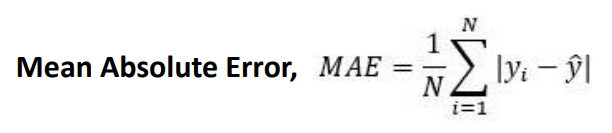

In [33]:
# Mean Absolute Error = MAE

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df['rent'], df['predicted_rent'])

In [34]:
print(f"mae = {mae}")

mae = 2009.8695093576282


### L2 Loss (Squared Loss or Mean Squared Error):

- L2 loss measures the squared difference between predicted values and actual observed values in regression problems.

- It calculates the squared difference between the predicted value and the actual value for each data point and then averages these squared differences.

- Mathematically, the L2 loss for the ith data point is (Yi - Ypred)^2, where Yi is the observed value and Ypred is the predicted value.

- L2 loss penalizes larger errors more heavily due to the squaring operation.

- Mean Squared Error, MSE = (1/N) * Σ([Yi - avg(Y)]^2)

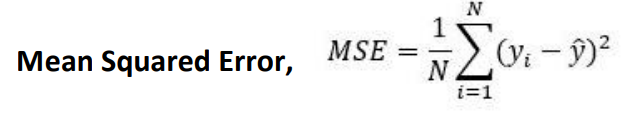

In [35]:
# Mean Squared Error = MSE

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['rent'], df['predicted_rent'])

In [36]:
print(f"mse = {mse}")

mse = 6778077.204095561


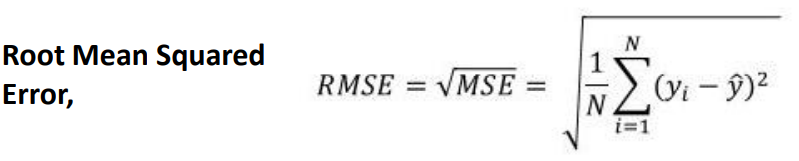

In [37]:
# RMSE 

import math

rmse = math.sqrt(mse)

print(f"rmse = {rmse}")

rmse = 2603.474064417689


### Find Best Fit Line

Text(0.5, 1.0, 'Dhaka Rent Analysis')

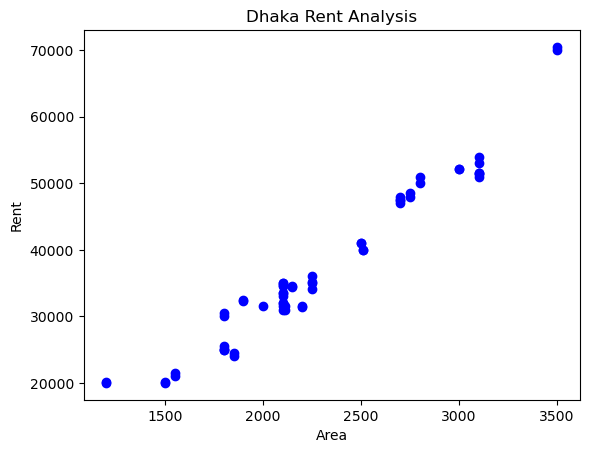

In [38]:
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.scatter(df['area'], df['rent'], color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')

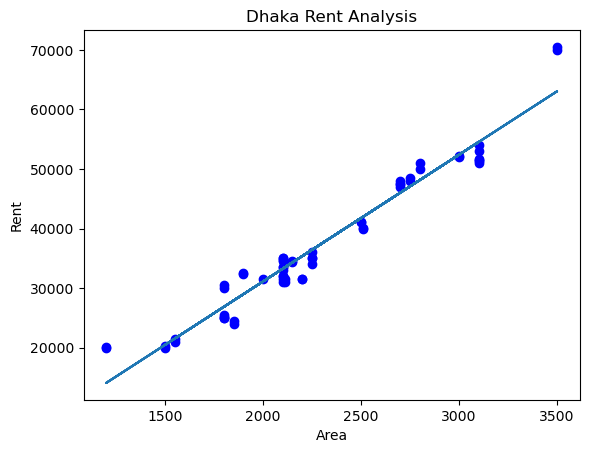

In [39]:
#BEST FIT LINE

#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.scatter(df['area'], df['rent'], color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')

#plt.plot(x, reg.predict(x))
plt.plot(x, df['predicted_rent'])

In [40]:
mean_x = np.mean(x)
mean_x

2289.0

In [41]:
mean_y = np.mean(y)
mean_y

37269.166666666664

### Plot mean of x and mean of y point in the best fit line

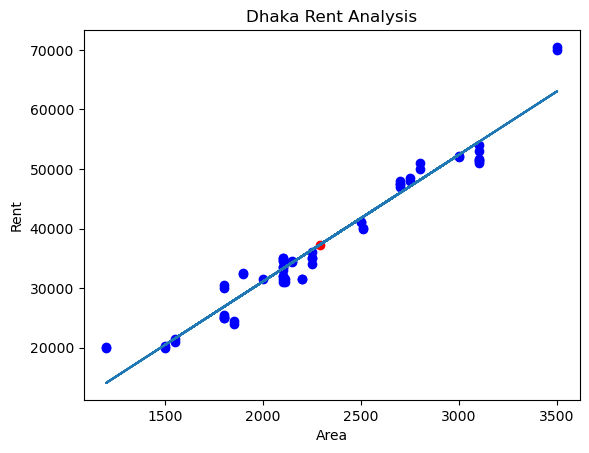

In [42]:
#BEST FIT LINE
#plt.plot(x, reg.predict(x))
plt.plot(x, df['predicted_rent'])
#import matplotlib.pyplot as plt
plt.scatter(df['area'], df['rent'], color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')
#mean
plt.scatter(mean_x, mean_y, color='red', marker='o')